# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [10]:
# Code Here
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
from plotnine import *
import palmerpenguins as pp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

df_penguins = pp.load_penguins()
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [12]:
df_dummies = pd.get_dummies(df_penguins).dropna()
df_dummies

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [13]:
# Code Here
X = df_dummies.drop(columns=['bill_depth_mm']) # drop bill depth ( this is our dependednt/response )
Y = df_dummies['bill_depth_mm'] # use bill lenght as response/dependent var

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

# Linear

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

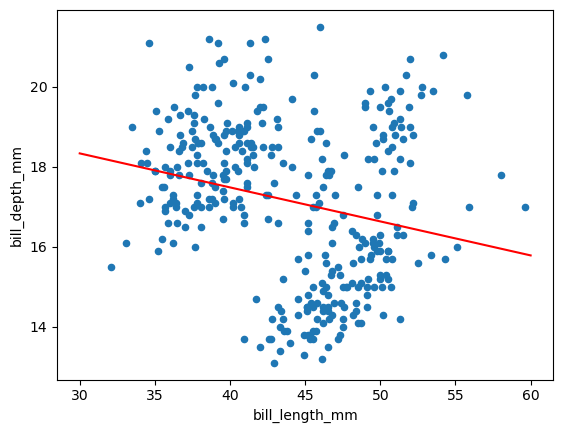

In [14]:
# linear
model = LinearRegression()
model.fit(X=df_dummies[["bill_length_mm"]], y=df_dummies["bill_depth_mm"])
new_X = pd.DataFrame()
new_X["bill_length_mm"] = np.linspace(30,60,num=1000)
new_Y = pd.Series(
    model.predict(new_X),
    index=new_X["bill_length_mm"]
)
df_dummies.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
new_Y.plot.line(c="red")

# Quadratic

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

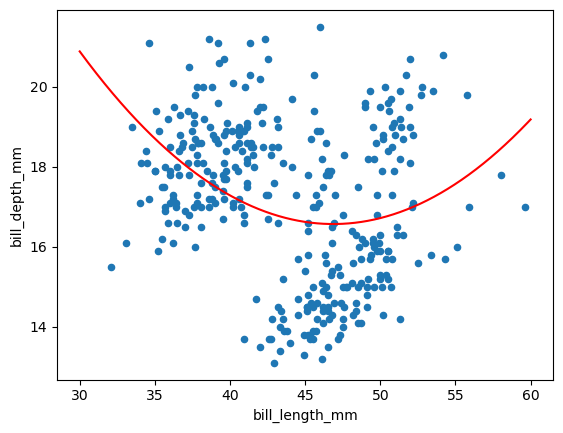

In [15]:
# quad model setup
df_dummies["bill_length_mm_quad"] = df_dummies["bill_length_mm"] ** 2

X = df_dummies[["bill_length_mm", "bill_length_mm_quad"]]
Y = df_dummies["bill_depth_mm"]

quad_model = LinearRegression()
quad_model.fit(X,Y)

new_X_quad = pd.DataFrame()
new_X_quad["bill_length_mm"] = np.linspace(30, 60, num=1000)
new_X_quad["bill_length_mm_quad"] = new_X_quad["bill_length_mm"]**2

new_Y_quad_pred = pd.Series(quad_model.predict(new_X_quad), index=new_X_quad["bill_length_mm"])

# predict with quad
df_dummies.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
new_Y_quad_pred.plot.line(c="red")


# Cubic

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

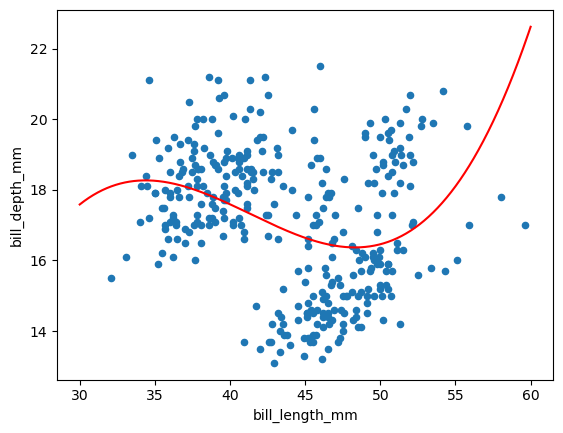

In [16]:
# cubic model setup
df_dummies["bill_length_mm_cubic"] = df_dummies["bill_length_mm"] ** 3

X = df_dummies[["bill_length_mm", "bill_length_mm_quad", "bill_length_mm_cubic"]]
Y = df_dummies["bill_depth_mm"]

cubic_model = LinearRegression()
cubic_model.fit(X,Y)

new_X_cubic = pd.DataFrame()
new_X_cubic["bill_length_mm"] = np.linspace(30, 60, num=1000)
new_X_cubic["bill_length_mm_quad"] = new_X_cubic["bill_length_mm"]**2
new_X_cubic["bill_length_mm_cubic"] = new_X_cubic["bill_length_mm"]**3


new_Y_cubic_pred = pd.Series(cubic_model.predict(new_X_cubic), index=new_X_cubic["bill_length_mm"])

# predict with cubic
df_dummies.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
new_Y_cubic_pred.plot.line(c="red")

# degree 10 polynomial

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

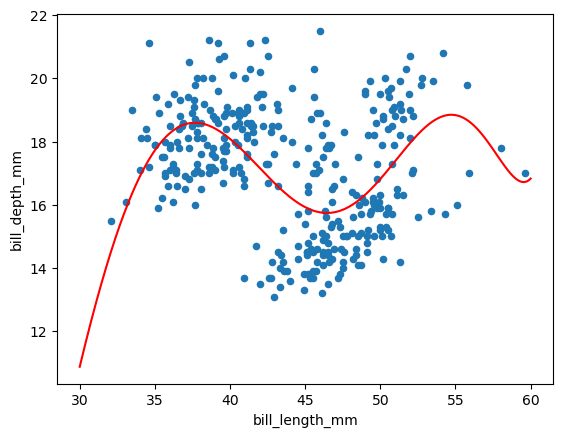

In [17]:
# degree 10 polynomial model setup
X_10 = pd.DataFrame(df_dummies["bill_length_mm"]) # create a dataframe with the original bill length
for i in range(2, 11): # loop from degree 2 to 10
    X_10[f"bill_length_mm_deg{i}"] = df_dummies["bill_length_mm"] ** i # add columns for each polynomial degree

Y_10 = df_dummies["bill_depth_mm"]

model_10 = LinearRegression()
model_10.fit(X_10, Y_10)

new_X_10 = pd.DataFrame(np.linspace(30, 60, num=1000), columns=["bill_length_mm"])
for i in range(2, 11): # loop from degree 2 to 10
    new_X_10[f"bill_length_mm_deg{i}"] = new_X_10["bill_length_mm"] ** i # add columns for each polynomial degree

new_Y_10_pred = pd.Series(model_10.predict(new_X_10), index=new_X_10["bill_length_mm"]) # predict bill depth

# predict with degree 10 polynomial
df_dummies.plot.scatter(x="bill_length_mm", y="bill_depth_mm")
new_Y_10_pred.plot.line(c="red")

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model seems to be underfitting as the straight line doesn't capture the curvature of the data well.

The degree 10 polynomial model may be overfitting as the line is too wiggly and tries to fit every point, including noise.

The quadratic and cubic models seem to fit the data well as their curves generally follow the overall trend of the data without overfitting.